In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tqdm
import warnings
import pathlib
import json

warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

RS = 2734
DATA_DIR = pathlib.Path("../data")

In [4]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [5]:
train_data = pd.read_csv(DATA_DIR.joinpath("activity_train.csv.zip"),
                         parse_dates=["date"], index_col="date",
                         compression="zip")
test_data = pd.read_csv(DATA_DIR.joinpath("activity_test.csv.zip"),
                        parse_dates=["date"], index_col="date",
                        compression="zip")
activity_test_target = pd.read_csv(DATA_DIR.joinpath("activity_test_timestamps.csv"),
                                   index_col="date",
                                   parse_dates=["date"])
atactic_test_target = pd.read_csv(DATA_DIR.joinpath("atactic_test_timestamps.csv"),
                                  index_col="date",
                                  parse_dates=["date"])

In [6]:
train_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f50,f51,f52,f53,f54,f55,activity,atactic_1,atactic_2,atactic_3
date,,,,,,,,,,,,,,,,,,,,,
2018-02-13 08:30:00,49.048771,294.933268,1.675466,0.000051,0.024688,0.001628,1.724180e+06,728860.217994,1.179884,0.513442,...,342.95605,332.80826,332.81665,5493.318081,4829.339027,521.341026,33.998170,NaN,NaN,NaN
2018-02-13 08:31:00,49.007980,294.932866,1.675090,0.000051,0.024659,0.001633,1.724523e+06,729611.819621,1.179814,0.513436,...,342.97174,332.82263,332.78198,5247.641087,5020.168781,520.791888,34.623659,NaN,NaN,NaN
2018-02-13 08:32:00,48.994400,294.932703,1.675766,0.000051,0.024727,0.001639,1.724582e+06,730361.831348,1.179867,0.513290,...,342.97382,332.84164,332.82962,5000.878811,5207.399845,520.242810,33.969483,NaN,NaN,NaN
2018-02-13 08:33:00,48.970760,294.936968,1.675868,0.000051,0.024723,0.001641,1.724677e+06,730486.077321,1.186719,0.511677,...,342.97943,332.88272,332.88680,4751.941204,5387.604237,521.320522,32.701220,NaN,NaN,NaN
2018-02-13 08:34:00,48.952991,294.935404,1.675002,0.000051,0.024708,0.001646,1.724621e+06,730061.574144,1.186838,0.511305,...,342.98720,332.91257,332.90576,4513.198853,5566.278934,522.398114,32.337694,NaN,NaN,NaN


In [7]:
test_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:30:00,57.132648,294.708041,1.636037,0.000052,0.019928,0.001852,1.716315e+06,743388.392658,2.989328,0.591614,...,336.59200,336.64236,336.08533,336.16528,343.03546,333.43230,333.38052,522.152305,2178.483009,7568.408012
2019-01-01 00:31:00,57.119122,294.702589,1.635624,0.000052,0.019988,0.001874,1.715817e+06,741369.594337,2.989310,0.591480,...,336.59048,336.64197,336.09860,336.19940,343.03375,333.41724,333.36392,522.445917,1944.569945,7747.926235
2019-01-01 00:32:00,57.079891,294.718029,1.634823,0.000052,0.019912,0.001874,1.716210e+06,743306.512832,2.989467,0.591614,...,336.60050,336.64154,336.26498,336.40747,343.01495,333.37753,333.29938,523.043394,1710.854053,7923.093796
2019-01-01 00:33:00,57.057171,294.718260,1.636119,0.000052,0.019999,0.001885,1.715934e+06,741396.762914,2.989151,0.591434,...,336.62912,336.67390,336.12607,336.23605,342.99408,333.36500,333.30533,523.640990,1476.246953,8097.620964
2019-01-01 00:34:00,57.040150,294.744400,1.635117,0.000052,0.020087,0.001895,1.716098e+06,744469.664631,2.989379,0.591440,...,336.63336,336.69170,336.30340,336.46835,342.97284,333.34850,333.30220,524.238527,1239.382029,8269.639015


In [9]:
data = pd.concat([train_data[test_data.columns], test_data])
data.drop("f28", axis=1, inplace=True)

train_targets = train_data[["activity", "atactic_1", "atactic_2", "atactic_3"]].copy()

In [18]:
activity_data = train_targets[["activity"]].join(data.shift(6, freq="H"))
activity_data = activity_data[activity_data.notnull().all(axis=1)]
activity_data.head()

,activity,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55
date,,,,,,,,,,,,,,,,,,,,,
2018-02-13 14:30:00,32.449896,49.048771,294.933268,1.675466,0.000051,0.024688,0.001628,1.724180e+06,728860.217994,1.179884,...,335.67578,335.74625,336.91620,336.97977,342.95605,332.80826,332.81665,5493.318081,4829.339027,521.341026
2018-02-13 14:31:00,26.492102,49.007980,294.932866,1.675090,0.000051,0.024659,0.001633,1.724523e+06,729611.819621,1.179814,...,335.66540,335.73734,336.98390,337.02980,342.97174,332.82263,332.78198,5247.641087,5020.168781,520.791888
2018-02-13 14:32:00,34.102710,48.994400,294.932703,1.675766,0.000051,0.024727,0.001639,1.724582e+06,730361.831348,1.179867,...,335.63095,335.70050,336.97913,337.05157,342.97382,332.84164,332.82962,5000.878811,5207.399845,520.242810
2018-02-13 14:33:00,41.518222,48.970760,294.936968,1.675868,0.000051,0.024723,0.001641,1.724677e+06,730486.077321,1.186719,...,335.57654,335.65533,337.00995,337.05280,342.97943,332.88272,332.88680,4751.941204,5387.604237,521.320522
2018-02-13 14:34:00,38.896862,48.952991,294.935404,1.675002,0.000051,0.024708,0.001646,1.724621e+06,730061.574144,1.186838,...,335.53976,335.63748,337.05005,337.10764,342.98720,332.91257,332.90576,4513.198853,5566.278934,522.398114


In [19]:
activity_data.shape[0]

300759

In [20]:
activity_data.index.min(), activity_data.index.max()

(Timestamp('2018-02-13 14:30:00'), Timestamp('2018-12-31 22:07:00'))

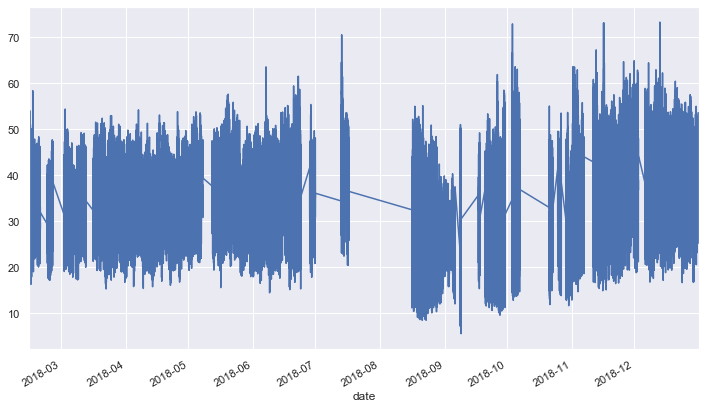

In [27]:
plt.figure(figsize=(12,7))
activity_data.activity.plot()

In [72]:
PERIODS = ["1H"]
AGGREGATES = ["mean", "median", "std", "max", "min"]

all_features = []

for period in tqdm.tqdm_notebook(PERIODS):
    for agg in AGGREGATES:
        rolling_features = data.rolling(period).aggregate(agg)
        rolling_features.rename(lambda x: "_".join([x, period, agg]), axis=1, inplace=True)
        all_features.append(rolling_features)
        
all_features = pd.concat(all_features, axis=1)
full_data = data.join(all_features)

activity_data = train_targets[["activity"]].join(full_data.shift(6, freq="H"))
activity_data = activity_data[activity_data.notnull().all(axis=1)]

In [75]:
from sklearn.ensemble import RandomForestRegressor

def get_folds(df):
    dates = ["2018-08", "2018-09", "2018-10", "2018-11", "2018-12"]
    
    for dt in dates:
        yield (set(df[:dt].index), set(df[dt:].index))

feature_cols = activity_data.drop("activity", axis=1).columns
target_col = "activity"

X = activity_data[feature_cols]
y = activity_data[target_col]

X_test = activity_test_target.join(data.shift(6, freq="H")).ffill()
test_preds = np.zeros(X_test.shape[0])

for i, (train_idx, val_idx) in enumerate(get_folds(activity_data)):
    X_train, y_train = X[X.index.isin(train_idx)], y[y.index.isin(train_idx)]
    X_val, y_val = X[X.index.isin(val_idx)], y[y.index.isin(val_idx)]
    
    model = RandomForestRegressor(random_state=RS, n_jobs=-1)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_val)
    score = mape(y_val, preds)
    
    test_preds += model.predict(X_test) / 5
    
    print(f"Fold #{i} - MAPE {score: 0.4f}")

ValueError: Number of features of the model must match the input. Model n_features is 330 and input n_features is 55 

In [71]:
make_submission(test_preds, activity_test_target.index, "rf_hourly_baseline_ensemble.csv")

In [54]:
test_activity_data = activity_test_target.join(data.shift(6, freq="H")).ffill()
test_activity_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:30:00,66.339180,294.978058,1.634820,0.000052,0.020070,0.001860,1.716141e+06,729420.377012,2.864499,0.596923,...,336.28918,336.33330,336.42343,336.59950,343.00235,333.13113,333.09894,520.764828,7689.127922,2691.111088
2019-01-01 00:31:00,66.314278,294.982008,1.635178,0.000052,0.020178,0.001861,1.716290e+06,729901.321623,2.864336,0.597082,...,336.26227,336.32053,336.47794,336.63120,342.99567,333.14960,333.09150,518.954873,7424.824238,2880.264044
2019-01-01 00:32:00,66.284439,294.989296,1.635126,0.000052,0.019989,0.001858,1.716658e+06,728220.844571,2.864242,0.596872,...,336.26800,336.32785,336.27304,336.38644,342.99720,333.13397,333.09380,517.144978,7162.104130,3062.118053
2019-01-01 00:33:00,66.235100,294.985819,1.634738,0.000052,0.020063,0.001855,1.715903e+06,729830.898425,2.864367,0.596920,...,336.23557,336.29910,336.33110,336.44128,342.99255,333.15585,333.13520,515.335083,6894.687176,3252.234936
2019-01-01 00:34:00,66.217377,294.988144,1.634998,0.000052,0.019948,0.001854,1.716463e+06,730332.979348,2.864228,0.596847,...,336.22662,336.29233,336.20364,336.28738,343.01773,333.17957,333.15665,514.244318,6638.810158,3427.839994


In [66]:
train_data.index.max(), test_activity_data.index.min(), test_activity_data.index.max()

(Timestamp('2018-12-31 22:07:00'),
 Timestamp('2019-01-01 00:30:00'),
 Timestamp('2019-03-14 00:00:00'))

In [69]:
test_preds2 = model.predict(test_activity_data)
test_preds3 = (test_preds + test_preds2) / 2

def make_submission(test_preds, date_index, filename):
    ts_preds = pd.DataFrame(test_preds, columns=["activity"], index=date_index)
    ts_preds.loc[date_index].to_csv(filename)
    
make_submission(test_preds3, activity_test_target.index, "rf_baseline_3_ensemble.csv")

In [64]:
subm = pd.read_csv("rf_baseline_1.csv")
subm.head()

,date,activity
0,2019-01-01 00:30:00,40.363488
1,2019-01-01 00:31:00,41.063586
2,2019-01-01 00:32:00,39.561294
3,2019-01-01 00:33:00,41.118683
4,2019-01-01 00:34:00,41.380313
